# 5.1 ベルヌーイモデル

In [6]:
# パッケージの読み込み
using Distributions, PyPlot, LinearAlgebra

In [2]:
function set_options(ax, xlabel, ylabel, title;
                     grid=true, gridy=false, legend=false)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    if grid
        if gridy
            ax.grid(axis="y")
        else
            ax.grid()
        end
    end
    legend && ax.legend()
    return
end

set_options (generic function with 1 method)

## 5.1.1 生成過程

ベルヌーイ分布のパラメータ$\mu$はわからないとして、一様分布を仮定。

このようなシミュレーションを **統計モデル（statistical model)** あるいは **確率モデル(probabilistic mode)** と呼ぶことにする。

In [3]:
function generate(N)
    μ = rand(Uniform(0, 1))
    X = rand(Bernoulli(μ), N)
    μ, X
end

# 5回コイン投を行う
generate(5)

(0.677175468264536, Bool[0, 1, 0, 0, 1])

In [4]:
# 1を表、0を裏とする
side(x) = x == 1 ? "表" : "裏"

for i in 1:10
    μ, X = generate(5)
    println("コイン $(i), 表が出る確率 μ = $(μ), 出目X = $(side.(X))")
end

コイン 1, 表が出る確率 μ = 0.16316551393246548, 出目X = ["裏", "裏", "表", "裏", "裏"]
コイン 2, 表が出る確率 μ = 0.7373662828102027, 出目X = ["表", "裏", "表", "表", "表"]
コイン 3, 表が出る確率 μ = 0.6858200939668478, 出目X = ["表", "裏", "表", "裏", "裏"]
コイン 4, 表が出る確率 μ = 0.734099285740637, 出目X = ["表", "裏", "表", "表", "裏"]
コイン 5, 表が出る確率 μ = 0.6364846552148273, 出目X = ["裏", "表", "表", "表", "裏"]
コイン 6, 表が出る確率 μ = 0.11810979005591116, 出目X = ["裏", "裏", "裏", "裏", "裏"]
コイン 7, 表が出る確率 μ = 0.1825592605613069, 出目X = ["表", "裏", "裏", "裏", "裏"]
コイン 8, 表が出る確率 μ = 0.18439409743131974, 出目X = ["表", "裏", "裏", "裏", "表"]
コイン 9, 表が出る確率 μ = 0.9231289757282264, 出目X = ["表", "表", "表", "表", "表"]
コイン 10, 表が出る確率 μ = 0.3375171650886606, 出目X = ["表", "裏", "裏", "裏", "表"]


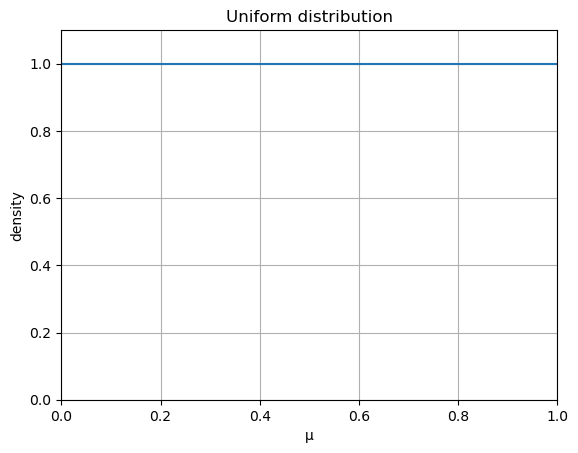

(0.0, 1.1)

In [5]:
μs = range(0, 1, length=100)
fig, ax = subplots()
ax.plot(μs, pdf.(Uniform(0, 1), μs))
set_options(ax, "μ", "density", "Uniform distribution")
ax.set_xlim([0,1])
ax.set_ylim([0,1.1])

## 5.1.2 伝承サンプリング
サンプリング結果が現実(X_obs1)と合致したときの$\mu$のとった値の頻度傾向を調べる。

- **事後分布(posterior distribution)** : シミュレーションで受容された$\mu$
- **事前分布(prior distribution)** : 最初に設定した$\mu$に関する一様分布

In [9]:
# ["裏", "裏", "裏", "表", "表"]をデータとして取得
X_obs1 = [0,0,0,1,1]
X_obs1'

1×5 adjoint(::Vector{Int64}) with eltype Int64:
 0  0  0  1  1

In [8]:
maxiter = 1_000_000
μ_posterior1 = []
for i in 1:maxiter
    # パラメータおよびデータの生成
    μ, X = generate(length(X_obs1))
    
    # X内の1の合計が観測と一致していれば、このときのパラメータを受容
    sum(X) == sum(X_obs1) && push!(μ_posterior1, μ)
end

# 受容率の計算
acceptance_rate = length(μ_posterior1) / maxiter
println("acceptance rate = $(acceptance_rate)")

μ_posterior1'

acceptance rate = 0.166575


1×166575 adjoint(::Vector{Any}) with eltype Any:
 0.305328  0.679251  0.395907  0.458899  …  0.432028  0.341777  0.327728

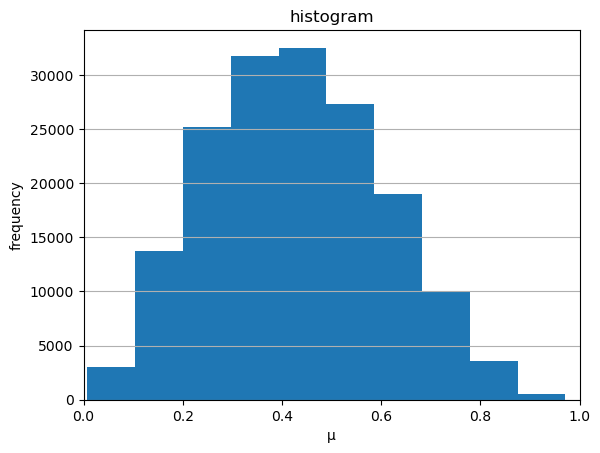

In [10]:
fig, ax = subplots()
ax.hist(μ_posterior1)
ax.set_xlim([0,1])
set_options(ax, "μ", "frequency", "histogram"; gridy=true)

In [11]:
X_obs2 = [0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1]
X_obs2'

1×20 adjoint(::Vector{Int64}) with eltype Int64:
 0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1

In [12]:
maxiter = 1_000_000
μ_posterior2 = []
for i in 1:maxiter
    # パラメータおよびデータの生成
    μ, X = generate(length(X_obs2))
    
    # X内の1の合計が観測と一致していれば、このときのパラメータを受容
    sum(X) == sum(X_obs2) && push!(μ_posterior2, μ)
end

# 受容率の計算
acceptance_rate = length(μ_posterior2) / maxiter
println("acceptance rate = $(acceptance_rate)")

μ_posterior2'

acceptance rate = 0.04784


1×47840 adjoint(::Vector{Any}) with eltype Any:
 0.45082  0.367658  0.359169  0.501622  …  0.276473  0.352019  0.461453

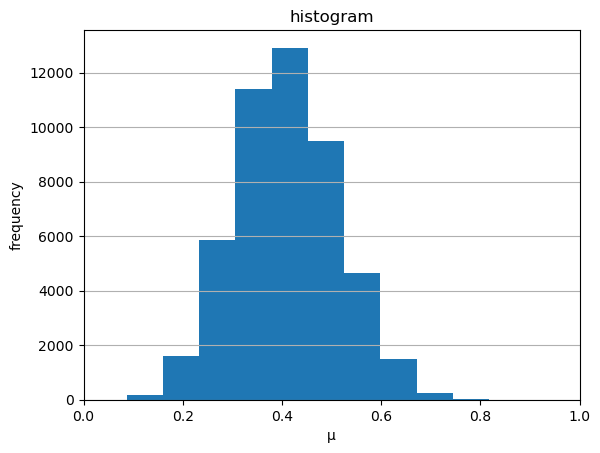

In [13]:
fig, ax = subplots()
ax.hist(μ_posterior2)
ax.set_xlim([0,1])
set_options(ax, "μ", "frequency", "histogram"; gridy=true)

## 5.1.3 予測(prediction)
一様分布として設定した事前分布の影響による差

In [14]:
pred1 = mean(rand.(Bernoulli.(μ_posterior1)))
pred2 = mean(rand.(Bernoulli.(μ_posterior2)))

println("$(pred1), $(pred2)")

0.4295722647456101, 0.40982441471571907


## 5.1.4 事前分布の変更
「裏面が必ず出やすくなるように作っている」($\mu<0.5$)知識を事前分布に反映

In [16]:
function generate2(N)
    # μの事前分布を修正
    μ = rand(Uniform(0, 0.5))
    X = rand(Bernoulli(μ), N)
    μ, X
end

# 5回コイン投を行う
generate2(5)

(0.3391114420390931, Bool[0, 0, 1, 0, 0])

In [17]:
for i in 1:10
    μ, X = generate2(5)
    println("コイン $(i), 表が出る確率 μ = $(μ), 出目X = $(side.(X))")
end

コイン 1, 表が出る確率 μ = 0.013580185671719258, 出目X = ["裏", "裏", "裏", "裏", "裏"]
コイン 2, 表が出る確率 μ = 0.42763635716860454, 出目X = ["裏", "表", "表", "表", "裏"]
コイン 3, 表が出る確率 μ = 0.202478874971671, 出目X = ["裏", "裏", "表", "裏", "裏"]
コイン 4, 表が出る確率 μ = 0.4335031421782265, 出目X = ["裏", "裏", "裏", "裏", "裏"]
コイン 5, 表が出る確率 μ = 0.22475979080247138, 出目X = ["裏", "裏", "裏", "裏", "裏"]
コイン 6, 表が出る確率 μ = 0.15944293529814668, 出目X = ["裏", "裏", "裏", "裏", "裏"]
コイン 7, 表が出る確率 μ = 0.21481704538595214, 出目X = ["裏", "裏", "裏", "表", "裏"]
コイン 8, 表が出る確率 μ = 0.017190316458751687, 出目X = ["裏", "裏", "裏", "裏", "裏"]
コイン 9, 表が出る確率 μ = 0.11432962183152606, 出目X = ["裏", "裏", "表", "裏", "裏"]
コイン 10, 表が出る確率 μ = 0.015157104073551919, 出目X = ["裏", "裏", "裏", "裏", "裏"]


In [18]:
maxiter = 1_000_000
μ_posterior3 = []
for i in 1:maxiter
    # パラメータおよびデータの生成
    μ, X = generate2(length(X_obs1))
    
    # X内の1の合計が観測と一致していれば、このときのパラメータを受容
    sum(X) == sum(X_obs1) && push!(μ_posterior3, μ)
end

# 受容率の計算
acceptance_rate = length(μ_posterior3) / maxiter
println("acceptance rate = $(acceptance_rate)")

μ_posterior3'

acceptance rate = 0.219202


1×219202 adjoint(::Vector{Any}) with eltype Any:
 0.478794  0.188427  0.253219  0.372182  …  0.46599  0.288206  0.429374

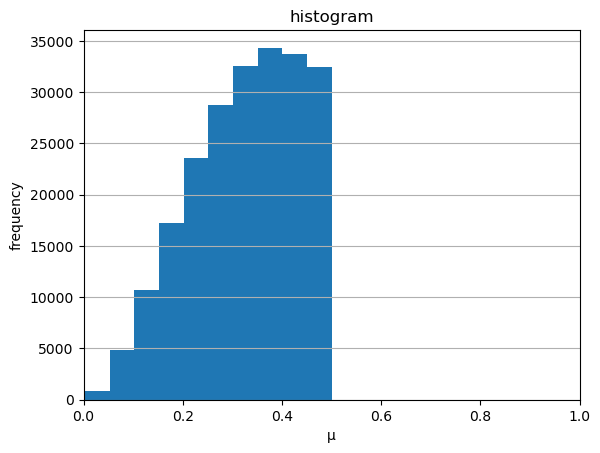

In [19]:
fig, ax = subplots()
ax.hist(μ_posterior3)
ax.set_xlim([0,1])
set_options(ax, "μ", "frequency", "histogram"; gridy=true)

In [22]:
pred3 = mean(rand.(Bernoulli.(μ_posterior3)))
println("$(pred3)")

0.32672603352159196


## 5.1.5 数値積分による推論計算
$$
    p(\mu \mid X) = \frac{p(X \mid \mu) p(\mu)}{p(X)}
$$
- 事後分布: $p(\mu \mid X)$  
- 事前分布: $p(\mu) = Uniform(\mu \mid 0,1)$  
- 尤度: $p(X \mid \mu) = Bernoulli(x_n \mid \mu) \quad$ for $\quad n = 1,2, \dots ,N$  
- 周辺尤度: $p(X) = \int p(X \mid \mu) p(\mu) d\mu$  
シンプルなモデルを想定しない限り、周辺尤度の積分計算は困難になり、代わりに積分近似を行うことによって$p(X)$の近似値を求める。

In [19]:
# 同時分布p(X, μ)の確率密度関数の定義
p_joint(X, μ) = prod(pdf.(Bernoulli(μ), X)) * pdf(Uniform(0, 1), μ)

# 数値積分
function approx_integration(μ_range, p)
    Δ = μ_range[2] - μ_range[1]
    X -> sum([p(X, μ) * Δ for μ in μ_range]), Δ
end

# μの積分範囲
μ_range = range(0, 1, length=100)

# 数値積分の実行
p_marginal, Δ = approx_integration(μ_range, p_joint)

# データ（2種類）
X_obs1 = [0,0,0,1,1]
X_obs2 = [0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1]

# それぞれの周辺尤度の近似計算
println("$(p_marginal(X_obs1)), $(p_marginal(X_obs2))")

0.016666666493163278, 3.7801895387034807e-7


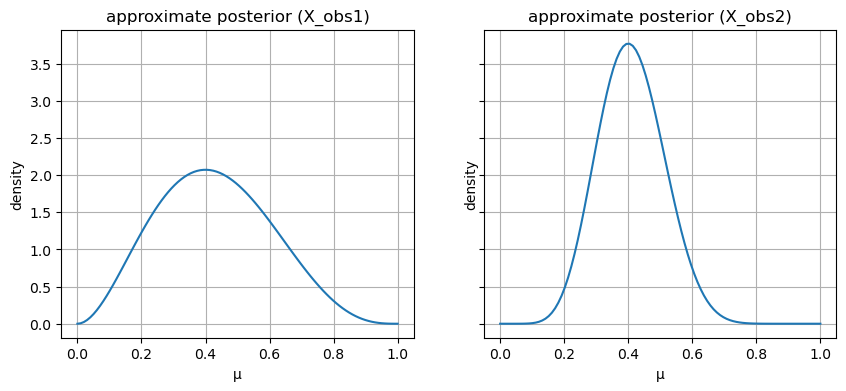

In [21]:
# パラメータの可視化の範囲
μs = range(0, 1, length=100)

fig, axes = subplots(1, 2, sharey=true, figsize=(10,4))
for (i, X_obs) in enumerate([X_obs1, X_obs2])
    posterior(μ) = p_joint(X_obs, μ)/p_marginal(X_obs)
    axes[i].plot(μs, posterior.(μs))
    set_options(axes[i], "μ", "density", "approximate posterior (X_obs$(i))")
end

新しいデータ$x_p$に対する予測分布は、次のように事前分布を事後分布に置き換えて得られる。
$$
    p(x_p \mid X) = \int p(x_p \mid \mu) p(\mu \mid X) d\mu = \int \frac{p(x_p \mid \mu) p(X, \mu)}{p_(X)} d\mu
$$

In [22]:
# 積分の中身の式
posterior1(μ) = p_joint(X_obs1, μ)/p_marginal(X_obs1)
posterior2(μ) = p_joint(X_obs2, μ)/p_marginal(X_obs2)
p_inner1(x, μ) = pdf.(Bernoulli(μ), x) * posterior1(μ)
p_inner2(x, μ) = pdf.(Bernoulli(μ), x) * posterior2(μ)

#　パラメータμに関する積分
μ_range = range(0, 1, length=100)
pred1, Δ1 = approx_integration(μ_range, p_inner1)
pred2, Δ1 = approx_integration(μ_range, p_inner2)

println("$(pred1(1)), $(pred2(1))")

0.4285714434416307, 0.40909090909090784


## 5.1.6 厳密解法

### 共役事前分布(conjugate prior distribution)
ベルヌーイ分布$\mu$の共役事後分布はベータ分布になる。  
事前分布 $p(\mu) = Beta(\mu \mid \alpha, \beta)$　の場合、
\begin{eqnarray}
    p(\mu \mid X) &=& \frac{p(X \mid \mu) p(\mu)}{p(X)} \\
                  &=& \frac{\{ \prod_{n=1}^N p(x_n \mid \mu)\} p(\mu)}{p(X)} \\
                  &\propto& \{ \prod_{n=1}^N p(x_n \mid \mu)\} p(\mu)
\end{eqnarray}
対数を取り、
\begin{eqnarray}
    \ln p(\mu \mid X) &=& \sum_{n=1}^N \ln p(x_n \mid \mu) + \ln p(\mu) + const. \\
                      &=& \sum_{n=1}^N x_n \ln \mu + \sum_{n=1}^N (1-x_n) \ln (1-\mu) + (\alpha-1) \ln \mu + (\beta-1) \ln (1-\mu) + const. \\
                      &=& (\sum_{n=1}^N x_n + \alpha-1) \ln \mu + (\sum_{n=1}^N (1-x_n) + \beta-1) \ln (1-\mu) + const. \\
                      &=& \hat{\alpha} \ln \mu + \hat{\beta} \ln (1-\mu) + const.
\end{eqnarray}

事後分布は、  
$p(\mu \mid X) = Beta(\mu \mid \hat{\alpha}, \hat{\beta})$  

ただし、  
$\hat{\alpha}　= \sum_{n=1}^N x_n + \alpha, \hat{\beta} = \sum_{n=1}^N (1-x_n) + \beta$

今回、事前分布として一様分布からスタート（$\alpha=1.0, \beta=1.0$）なので、事後分布のパラメータは厳密な数式として次のとおりとなる。 　 　
$\hat{\alpha} = 1.0 + \sum_{n=1}^N x_n$  
$\hat{\beta} = 1.0 + N - \sum_{n=1}^N x_n$  

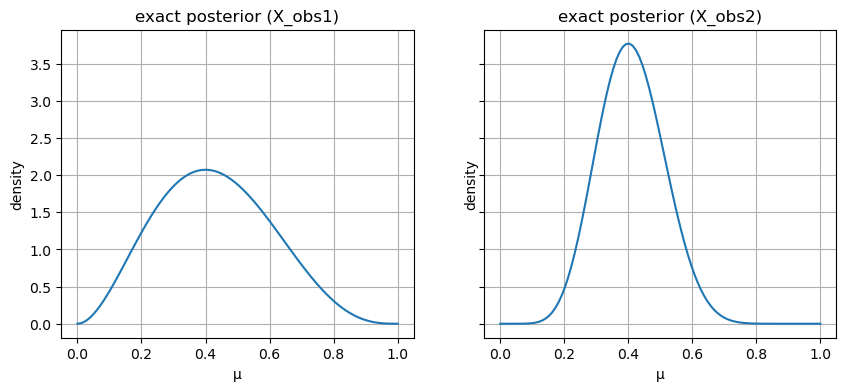

In [23]:
fig, axes = subplots(1, 2, sharey=true, figsize=(10, 4))
μs = range(0, 1, length=100)
for (i, X_obs) in enumerate([X_obs1, X_obs2])
    # 厳密な事後分布はベータ分布
    α = 1.0 + sum(X_obs)
    β = 1.0 + length(X_obs) - sum(X_obs)
    d = Beta(α, β)
    
    # 事後分布を可視化
    axes[i].plot(μs, pdf.(d, μs))
    set_options(axes[i], "μ", "density", "exact posterior (X_obs$(i))")
end

厳密解法による予測は次のようになり、サンプリングや数値積分で行った場合でも、それほど遜色のない結果が得られていたことがわかる。

In [24]:
function prediction(X_obs)
    α = 1.0 + sum(X_obs)
    β = 1.0 + length(X_obs) - sum(X_obs)
    α/(α + β)
end

println("$(prediction(X_obs1)), $(prediction(X_obs2))")

0.42857142857142855, 0.4090909090909091
